In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_landsat_satellite = fetch_ucirepo(id=146) 
  
# data (as pandas dataframes) 
X = statlog_landsat_satellite.data.features 
y = statlog_landsat_satellite.data.targets 
  
# metadata 
print(statlog_landsat_satellite.metadata) 
  
# variable information 
print(statlog_landsat_satellite.variables) 

{'uci_id': 146, 'name': 'Statlog (Landsat Satellite)', 'repository_url': 'https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite', 'data_url': 'https://archive.ics.uci.edu/static/public/146/data.csv', 'abstract': 'Multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood', 'area': 'Climate and Environment', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6435, 'num_features': 36, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C55887', 'creators': ['Ashwin Srinivasan'], 'intro_paper': None, 'additional_info': {'summary': "The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification as

In [8]:
print(X.isnull().sum())

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
dtype: int64


Class Distribution:
    Class  Count  Percentage
0      1   1533   23.822844
5      7   1508   23.434343
2      3   1358   21.103341
4      5    707   10.986791
1      2    703   10.924631
3      4    626    9.728050


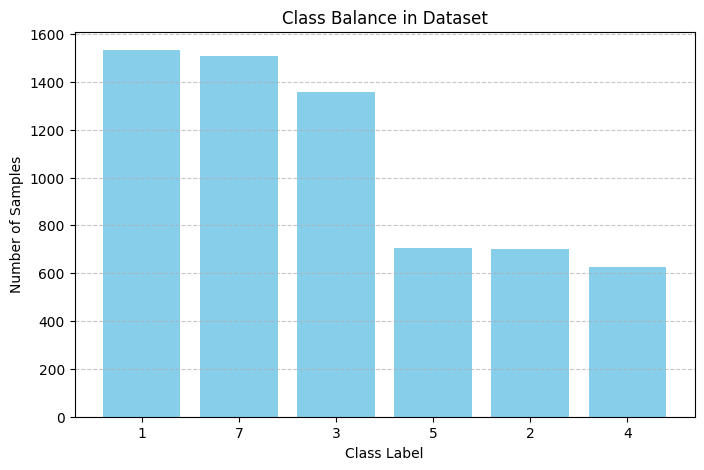

Count of class (6):  0


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# If y is a NumPy array
unique_classes, counts = np.unique(y, return_counts=True)

# Create a DataFrame for easier display
class_distribution = pd.DataFrame({
    'Class': unique_classes,
    'Count': counts,
    'Percentage': 100 * counts / len(y)
}).sort_values(by='Count', ascending=False)

print("Class Distribution:\n", class_distribution)

# Optional: Visualize the class balance
plt.figure(figsize=(8, 5))
plt.bar(class_distribution['Class'].astype(str), class_distribution['Count'], color='skyblue')
plt.title("Class Balance in Dataset")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('Count of class (6): ', np.sum(y==6))


In [20]:
print("\nShape of X:", X.shape)
print("\nMax of 1st column of X:\n", X.iloc[:,0].max())
print("\nMin of 1st column of X:\n", X.iloc[:,0].min())

# Standardize the features(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nMin of 1st column of X after transformation:\n", X_scaled[:,0].min())
print("\nMax of 1st column of X after transformation:\n", X_scaled[:,0].max())


Shape of X: (6435, 36)

Max of 1st column of X:
 104

Min of 1st column of X:
 39

Min of 1st column of X after transformation:
 -2.2345031253239562

Max of 1st column of X after transformation:
 2.543217372901607


# Train/Test Split


In [25]:
from sklearn.model_selection import train_test_split
y = y.values.ravel()  # Convert from pandas Series to numpy array if needed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify = y)

In [26]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (5148, 36), y_train shape: (5148,)
X_test shape: (1287, 36), y_test shape: (1287,)


# Train all Models

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
models = {
    "Dummy (Prior)" : DummyClassifier(strategy = 'prior'),
    "Logistic Regression" : LogisticRegression(max_iter = 1000, random_state = 42),
    "Naive Bayes (Gaussian)" : GaussianNB(),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors = 5),
    "Decision Tree" : DecisionTreeClassifier(random_state = 42),
    "Support Vector Machine" : SVC(probability = True, random_state = 42)
}

for name , model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully\n")

Dummy (Prior) trained successfully

Logistic Regression trained successfully

Naive Bayes (Gaussian) trained successfully

K-Nearest Neighbors trained successfully

Decision Tree trained successfully

Support Vector Machine trained successfully



# Baseline Evaluation

In [31]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

In [33]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'Weighted F1-Score'])

results_df = results_df.sort_values(by = 'Accuracy', ascending = False).reset_index(drop = True)


print("\n Baseline Model Performance:\n")
print(results_df)


 Baseline Model Performance:

                    Model  Accuracy  Weighted F1-Score
0     K-Nearest Neighbors  0.911422           0.909397
1  Support Vector Machine  0.892774           0.891269
2     Logistic Regression  0.849262           0.842108
3           Decision Tree  0.846931           0.848079
4  Naive Bayes (Gaussian)  0.783217           0.790059
5           Dummy (Prior)  0.238539           0.091884


# Part B: ROC Analysis for Model Selection

# One-vs-Rest (OvR) Approach for Multi-Class ROC and AUC

In a **multi-class classification problem**, each instance belongs to one of *K* possible classes.  
Unlike binary classification (which has only one positive and one negative class), calculating the **Receiver Operating Characteristic (ROC)** curve and **Area Under the Curve (AUC)** for multiple classes requires a strategy to handle this multi-dimensional setup.

The **One-vs-Rest (OvR)** method is a common approach used for this purpose.

---

## ⚙️ How the OvR Approach Works

For each class *i* (out of *K* total classes):

1. The classifier treats that class as the **positive class**.  
2. All other classes combined are treated as the **negative class**.  
3. This effectively converts the multi-class problem into *K* binary classification problems.

For each binary problem:
- The model outputs the **probability** of each sample belonging to class *i*.  
- These probabilities are used to compute:
  - **True Positive Rate (TPR)**
  - **False Positive Rate (FPR)**  
  at different threshold levels.
- An **ROC curve** is plotted for each class.

---

## 📈 AUC Calculation

- The **AUC (Area Under Curve)** represents how well the model distinguishes the positive class from the rest.  
- AUC is calculated **separately for each class** using the OvR curves.

### 🔹 Overall Performance Metrics

- **Macro-average AUC** → Average of AUCs for all classes (treats all classes equally).  
- **Weighted-average AUC** → Weighted average of AUCs based on the number of samples per class (accounts for class imbalance).

---

## 💡 Conceptual Example

If there are **3 classes**: A, B, and C:

| Model  | Positive Class | Negative Classes | ROC Curve       |
|:--------|:----------------|:------------------|:----------------|
| Model 1 | A               | (B + C)           | ROC for Class A |
| Model 2 | B               | (A + C)           | ROC for Class B |
| Model 3 | C               | (A + B)           | ROC for Class C |

Each produces its own **ROC curve** and **AUC value**.  
These can then be combined using macro or weighted averaging to get an overall performance score.

---

✅ **In summary:**  
The OvR approach decomposes a multi-class problem into multiple binary ones, allowing the use of traditional ROC and AUC metrics to evaluate classification performance across all classes.


# Plotting ROC

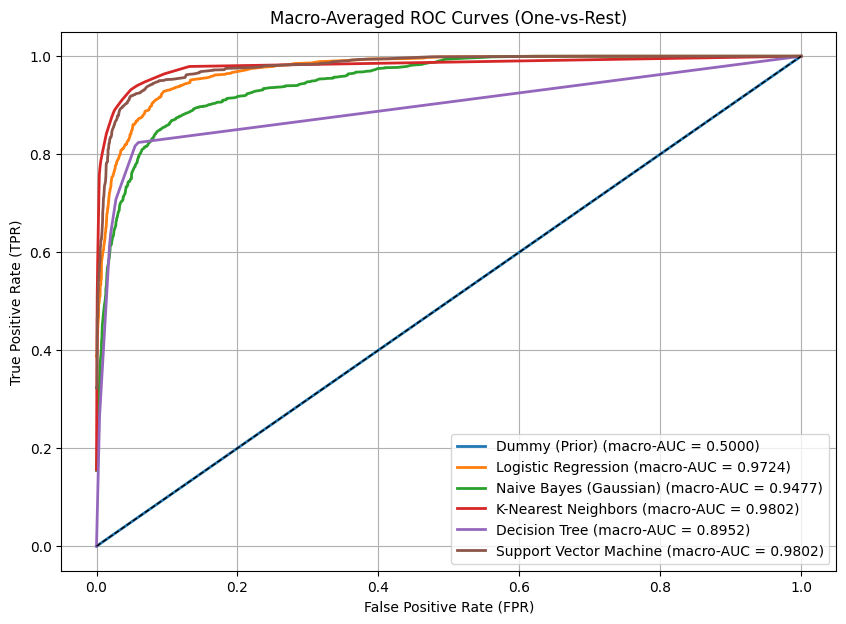

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Assuming models is a dictionary of trained models:
# models = {
#     "KNN": knn,
#     "Decision Tree": dt,
#     "Dummy": dummy,
#     "Logistic Regression": lr,
#     "Naive Bayes": nb,
#     "SVC": svc
# }

# Binarize the labels for multi-class ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Get model probability scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        # For models without predict_proba (like some SVMs), use decision_function
        y_score = model.decision_function(X_test)

    # Compute ROC curve and AUC using One-vs-Rest
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)

    roc_auc_macro = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, lw=2,
             label=f'{name} (macro-AUC = {roc_auc_macro:.4f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('Macro-Averaged ROC Curves (One-vs-Rest)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Part C: Precision - Recall Curve (PRC) Analysis

# 1. PRC Calculation

### **Precision-Recall Curve (PRC) Calculation**

The **Precision-Recall Curve (PRC)** is often a more suitable evaluation metric than the **Receiver Operating Characteristic (ROC)** curve when dealing with **highly imbalanced datasets**.

#### **1. ROC Curve Limitation in Imbalanced Data**

* The **ROC curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**.
* In imbalanced datasets, the number of **negative samples** is much larger than the number of **positive samples**.
* As a result, even a small number of false positives can lead to a very low FPR, making the ROC curve appear **overly optimistic** — the model may seem to perform well even though it struggles to correctly identify the minority class.

#### **2. Why PRC is More Informative**

* The **PRC** focuses only on the **positive (minority) class**, plotting **Precision** (how many predicted positives are actually correct) versus **Recall** (how many true positives are captured).
* This makes it more sensitive to changes in the classifier’s ability to detect minority classes, which is often the main concern in imbalanced problems.

#### **3. Conceptual Importance**

* In many real-world applications (e.g., fraud detection, medical diagnosis, fault detection), the **minority class** carries more importance.
* **Precision–Recall trade-offs** better capture this importance, as high recall with low precision or vice versa directly shows the type of error the model is making.

#### **4. Summary**

| Metric        | Focus                                     | Sensitive to Class Imbalance? | Suitable for        |
| :------------ | :---------------------------------------- | :---------------------------- | :------------------ |
| **ROC Curve** | True Positive Rate vs False Positive Rate | ❌ No                          | Balanced datasets   |
| **PRC Curve** | Precision vs Recall                       | ✅ Yes                         | Imbalanced datasets |

Even if the class imbalance in the Landsat dataset is moderate, using PRC helps emphasize model behavior for less frequent classes and provides a more realistic measure of performance when precision and recall are critical.



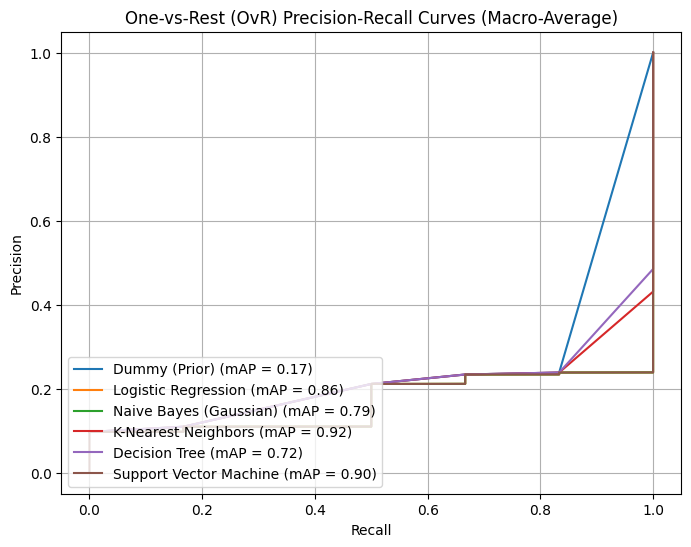

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have the following variables already:
# models = {'KNN': knn, 'Decision Tree': dt, 'Dummy': dummy,
#           'Logistic Regression': log_reg, 'Naive Bayes': nb, 'SVC': svc}
# and your test sets: X_test, y_test

# Step 1: Binarize labels for multi-class PRC (OvR approach)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Step 2: Initialize plot
plt.figure(figsize=(8, 6))

# Step 3: Compute and plot PRC for each model
for model_name, model in models.items():
    # Get probability estimates
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        # Some models (e.g., SVM with probability=False) may not support predict_proba
        y_score = model.decision_function(X_test)
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # normalize

    # Compute per-class precision-recall
    precision = dict()
    recall = dict()
    avg_precision = dict()
    
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # Compute macro-average Precision-Recall
    all_precision = np.unique(np.concatenate([precision[i] for i in range(n_classes)]))
    mean_recall = np.zeros_like(all_precision)
    for i in range(n_classes):
        mean_recall += np.interp(all_precision, precision[i][::-1], recall[i][::-1])
    mean_recall /= n_classes

    # Compute mean average precision
    mean_avg_precision = np.mean(list(avg_precision.values()))
    
    # Plot
    plt.plot(mean_recall, all_precision,
             label=f"{model_name} (mAP = {mean_avg_precision:.2f})")

# Step 4: Finalize the plot
plt.title("One-vs-Rest (OvR) Precision-Recall Curves (Macro-Average)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()



### **PRC Interpretation [5]**

#### **1. Best-Performing Model**

From the plotted Precision-Recall Curves, the **K-Nearest Neighbors (KNN)** classifier achieved the **highest Average Precision (mAP ≈ 0.92)** across all classes.
This indicates that KNN maintains a strong balance between **high precision** (few false positives) and **high recall** (detecting most true positives).
Models like **Support Vector Machine (SVM)** and **Logistic Regression** also performed competitively, with mAP scores above 0.85, showing consistent precision-recall trade-offs across all six classes.


#### **2. Worst-Performing Model**

The **Dummy Classifier (Prior)** shows the **lowest Average Precision (mAP ≈ 0.17)**.
Its PRC curve lies close to the baseline, indicating that it makes predictions purely based on class frequency, not on feature patterns.
As recall increases, its **precision drops sharply**, because:

* The model starts predicting more instances as the positive class to capture more true positives.
* However, since its predictions are random (guided only by class priors), the number of **false positives** rises dramatically.
* This leads to a **steep decline in precision**, making the curve fall quickly toward the bottom-right region of the plot.


#### **3. Conceptual Insight**

For **poor models**, a sharp drop in precision as recall increases is typical —
it reflects that the model cannot **discriminate between true and false positives** effectively.
In contrast, **well-trained models** maintain higher precision even as recall increases, producing **flatter, higher PRC curves** that indicate strong predictive capability.


#### **Summary Table**

| Model                   | Mean Average Precision (mAP) | PRC Behavior       | Interpretation                                              |
| :---------------------- | :--------------------------: | :----------------- | :---------------------------------------------------------- |
| **K-Nearest Neighbors** |           **0.92**           | High, smooth curve | Best performer – maintains precision with increasing recall |
| **SVM**                 |             0.90             | Similar to KNN     | Strong discriminative power                                 |
| **Logistic Regression** |             0.86             | Gradual decline    | Reliable linear baseline                                    |
| **Naive Bayes**         |             0.79             | Moderate drop      | Assumption limits performance                               |
| **Decision Tree**       |             0.72             | Fluctuating curve  | Overfitting reduces generalization                          |
| **Dummy (Prior)**       |           **0.17**           | Sharp drop         | Random guessing, poor discrimination                        |

